In [14]:
!pip install colour

In [59]:
import pandas as pd
import numpy as np 
import folium
from colour import Color

import matplotlib.pyplot as plt

In [ ]:
# Чтобы сдать задание, выполните следующую последовательность действий.

#     1. Загрузите агрегированные данные о поездках в мае 2016. 
#     Просуммируйте общее количество поездок такси из каждой географической зоны и посчитайте количество ячеек, 
#     из которых в мае не было совершено ни одной поездки.

#     2. Нарисуйте статическую карту Нью-Йорка. 
#     Поставьте на карте точку там, где находится Эмпайр-Стейт-Билдинг.

#     3. Поверх статической карты Нью-Йорка визуализируйте данные о поездках из каждой ячейки так, 
#     чтобы цветовая шкала, в которую вы окрашиваете каждую ячейку, показывала суммарное количество поездок такси из неё.

#     4. Вставьте интерактивную карту Нью-Йорка — такую, 
#     которую можно прокручивать и увеличивать. Поставьте метку там, где находится статуя свободы.

#     5. Нарисуйте на интерактивной карте Нью-Йорка ячейки так, 
#     чтобы их цвет показывал среднее за месяц количество поездок такси в час из этой зоны.

#     6. Чтобы не выбирать из всех 2500 ячеек вручную, отфильтруйте ячейки, из которых в мае совершается в среднем меньше 5 поездок в час. 
#     Посчитайте количество оставшихся. Проверьте на карте, что среди этих ячеек нет таких, из которых поездки на самом деле невозможны.

#     7. Сохраните ноутбук в формате html, запакуйте ipynb и html в один архив
#      и загрузите его в форму (html облегчит задачу проверки вашим рецензентам — 
#      в ipynb динамические карты часто не сохраняются, а для выполнения кода рецензентам придётся устанавливать все библиотеки). 

In [7]:
# подключение гугл диска
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
# Читаем данные
data = pd.read_csv('/content/gdrive/MyDrive/YellowTaxi/data/agg_table_2016-05.csv')
regions = pd.read_csv('/content/gdrive/MyDrive/YellowTaxi/data/regions.csv', sep=';', header=0)
data.head()

,date,start_region,trips_count
0,2016-05-01 00:00:00,1,0
1,2016-05-01 00:00:00,2,0
2,2016-05-01 00:00:00,3,0
3,2016-05-01 00:00:00,4,0
4,2016-05-01 00:00:00,5,0


In [13]:
# Задание 1
# посчитаем варианты количеств значений для зон
# из 1283 зон не было совершено ни одной поездки за май
data.groupby('start_region')['trips_count'].sum().value_counts()

0       1283
1        252
2        115
3         74
5         42
        ... 
111        1
113        1
115        1
2176       1
3839       1
Name: trips_count, Length: 347, dtype: int64

In [20]:
# Задание 2

# Рисуем Empire State Building
empire_coordinates = [40.748817, -73.985428]
lat = empire_coordinates[0]
lon = empire_coordinates[1]
title = 'Empire State Building'
tooltip = 'OpenStreetMap'
m = folium.Map(location=[40.75, -74.00], zoom_start=11, min_zoom =11, max_zoom=11, 
               png_enabled=False)

folium.Circle([lat, lon], radius=500, fill=True).add_child(folium.Popup('Empire State Building')).add_to(m)

folium.map.Marker([lat+0.003, lon],icon=folium.features.DivIcon(icon_size=(200,36),
        icon_anchor=(0,0),html='<div style="font-size: 16pt"><b>%s</b></div>' % title,
        )).add_to(m)
m

In [66]:
# Суммарное количество поездок из аггрегации, координаты зон берем из regions
trips_count = data.groupby('start_region')['trips_count'].sum()
trips_count

start_region
1       0
2       0
3       0
4       0
5       0
       ..
2496    0
2497    0
2498    0
2499    0
2500    0
Name: trips_count, Length: 2500, dtype: int64

In [30]:
regions.head()

,region,west,east,south,north
0,1,-74.25559,-74.244478,40.496120,40.504508
1,2,-74.25559,-74.244478,40.504508,40.512896
2,3,-74.25559,-74.244478,40.512896,40.521285
3,4,-74.25559,-74.244478,40.521285,40.529673
4,5,-74.25559,-74.244478,40.529673,40.538061


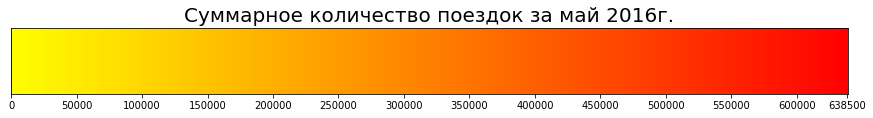

In [76]:
# Градиент.
color_1 = 'Yellow'
color_2 = 'Red'
color_1 = Color(color_1)
grad = list(color_1.range_to(Color(color_2), int(trips_count.max())))

# # Colorbar.
plt.figure(figsize=(15, 1.5))
trips_values = list(range(0, int(trips_count.max())+1, 500))
colorbar = np.array([[tuple([int(round(j*255, 0)) for j in grad[int(i)-1].rgb]) for i in trips_values] for _ in range(100)])
plt.imshow(colorbar)
plt.yticks([])
ticks = list(range(len(trips_values)))
plt.xticks(ticks=ticks[::100] + [ticks[-1]], labels=trips_values[::100] + [trips_values[-1]])
plt.title('Суммарное количество поездок за май 2016г.', y=1.01, fontsize=20)
plt.show()

# Карта.
m = folium.Map(location=[40.75, -74.00], zoom_start=11, min_zoom =10, max_zoom=12, png_enabled=False)

# Рисуем суммарное количество поездок
features = []
for i in range(2500):
    # если нет поездок - не раскрашиваем область
    if not trips_count.iloc[i]:
      continue
    
    west = regions.iloc[i][1]
    east = regions.iloc[i][2]
    south = regions.iloc[i][3]
    north = regions.iloc[i][4]
    
    left_down = (south, west)
    left_up = (north, west)
    right_up = (north, east)
    right_down = (south, east)
    
    fillcolor = grad[int(trips_count.iloc[i])-1].hex_l
    
    folium.vector_layers.Rectangle([left_down, left_up, right_up, right_down], 
                                   popup=None, tooltip=f"( {int(regions.iloc[i][0])}, {trips_count.iloc[i]} )", 
                                   fill=True, fill_color=fillcolor, fill_opacity = 0.5,
                                   stroke=True, color=Color('Black').hex_l, weight=1, opacity=0.1).add_to(m)

In [77]:
m

In [78]:
# 4. Вставьте интерактивную карту Нью-Йорка — такую, 
#     которую можно прокручивать и увеличивать. Поставьте метку там, где находится статуя свободы.

# Рисуем статую свободы
liberty_coordinates = [40.689247, -74.044502]
lat = liberty_coordinates[0]
lon = liberty_coordinates[1]
title = 'Statue Of Liberty'

tooltip = 'OpenStreetMap'
m = folium.Map(location=[40.75, -74.00], zoom_start=11, min_zoom =10, max_zoom=13, 
               png_enabled=False)

folium.Circle([lat, lon], radius=500, fill=True).add_child(folium.Popup('Statue Of Liberty')).add_to(m)

folium.map.Marker([lat+0.003, lon],icon=folium.features.DivIcon(icon_size=(200,36),
        icon_anchor=(0,0),html='<div style="font-size: 16pt"><b>%s</b></div>' % title,
        )).add_to(m)
m

In [86]:
# 5. Нарисуйте на интерактивной карте Нью-Йорка ячейки так, 
#     чтобы их цвет показывал среднее за месяц количество поездок такси в час из этой зоны.

# среднее количество поездок из аггрегации, координаты зон берем из regions
trips_mean = data.groupby('start_region')['trips_count'].mean()
trips_mean

start_region
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
       ... 
2496    0.0
2497    0.0
2498    0.0
2499    0.0
2500    0.0
Name: trips_count, Length: 2500, dtype: float64

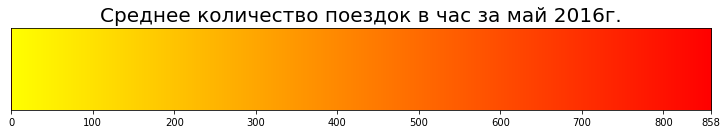

In [95]:
# Градиент.
color_1 = 'Yellow'
color_2 = 'Red'
color_1 = Color(color_1)
grad = list(color_1.range_to(Color(color_2), int(trips_mean.max())))

# # Colorbar.
plt.figure(figsize=(15, 1.5))
trips_values = list(range(0, int(trips_mean.max())+1))
colorbar = np.array([[tuple([int(round(j*255, 0)) for j in grad[int(i)-1].rgb]) for i in trips_values] for _ in range(100)])
plt.imshow(colorbar)
plt.yticks([])
ticks = list(range(len(trips_values)))
plt.xticks(ticks=ticks[::100] + [ticks[-1]], labels=trips_values[::100] + [trips_values[-1]])
plt.title('Среднее количество поездок в час за май 2016г.', y=1.01, fontsize=20)
plt.show()

# Карта.
m = folium.Map(location=[40.75, -74.00], zoom_start=11, min_zoom =10, max_zoom=12, png_enabled=False)

# Рисуем среднее количество поездок
features = []
for i in range(2500):
    
    if trips_mean.iloc[i] < 5: # отфильтруйте ячейки, из которых в мае совершается в среднем меньше 5 поездок в час.
      continue
    
    west = regions.iloc[i][1]
    east = regions.iloc[i][2]
    south = regions.iloc[i][3]
    north = regions.iloc[i][4]
    
    left_down = (south, west)
    left_up = (north, west)
    right_up = (north, east)
    right_down = (south, east)
    
    fillcolor = grad[int(trips_mean.iloc[i])-1].hex_l
    
    folium.vector_layers.Rectangle([left_down, left_up, right_up, right_down], 
                                   popup=None, tooltip=f"( {int(regions.iloc[i][0])}, {trips_mean.iloc[i]} )", 
                                   fill=True, fill_color=fillcolor, fill_opacity = 0.5,
                                   stroke=True, color=Color('Black').hex_l, weight=1, opacity=0.1).add_to(m)


In [96]:
m

In [103]:
#6. Чтобы не выбирать из всех 2500 ячеек вручную, отфильтруйте ячейки, из которых в мае совершается в среднем меньше 5 поездок в час. 
#     Посчитайте количество оставшихся. Проверьте на карте, что среди этих ячеек нет таких, из которых поездки на самом деле невозможны.

means = data.groupby('start_region')['trips_count'].mean()
means[means>=5]

start_region
1075     66.799731
1076    138.266129
1077     86.802419
1125     66.041667
1126    181.892473
           ...    
2068     95.056452
2069     10.545699
2118    146.490591
2119     34.692204
2168     68.532258
Name: trips_count, Length: 102, dtype: float64

In [ ]:
# судя по расположению этих квадратов на карте - все координаты соответствуют реальности
# зоны самых интенсивных поездок - это деловой центр и аэропорты